In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
df = pd.read_csv("E:\\Data Science\\8.Machine Learning Algorithms\\2.Classification\\hearing_test.csv")

In [35]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [36]:
df.shape

(5000, 3)

In [37]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [39]:
df.describe(include="all")

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


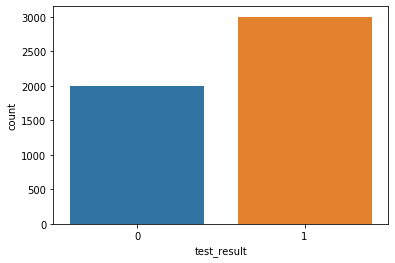

In [40]:
sns.countplot(data=df,x="test_result")
plt.show()

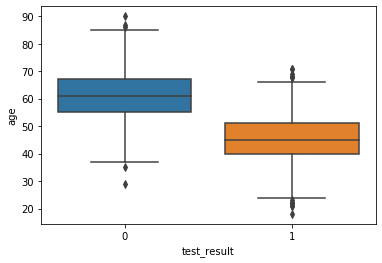

In [41]:
sns.boxplot(x="test_result",y="age",data =df)
plt.show()

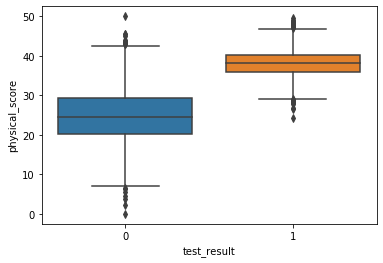

In [42]:
sns.boxplot(data = df,x="test_result",y="physical_score")
plt.show()

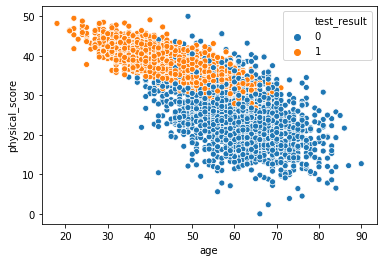

In [43]:
sns.scatterplot(x="age",y="physical_score",data=df,hue="test_result")
plt.show()

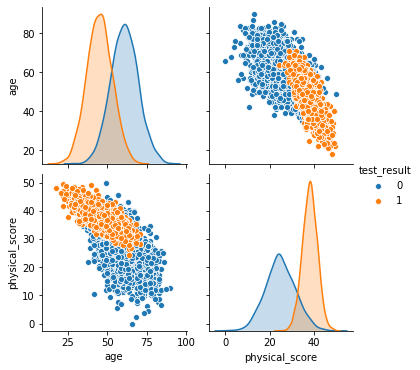

In [44]:
sns.pairplot(df,hue="test_result")
plt.show()

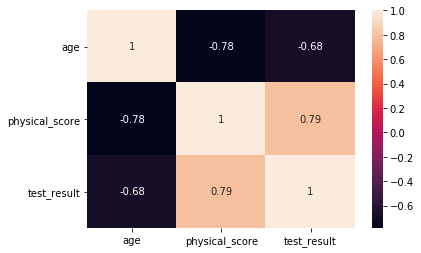

In [45]:
sns.heatmap(df.corr(),annot = True)
plt.show()

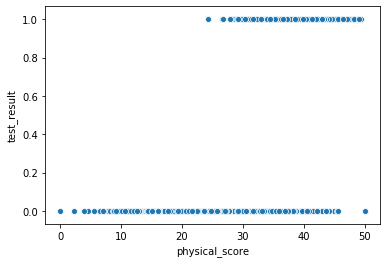

In [46]:
sns.scatterplot(x="physical_score",y="test_result",data = df)
plt.show()

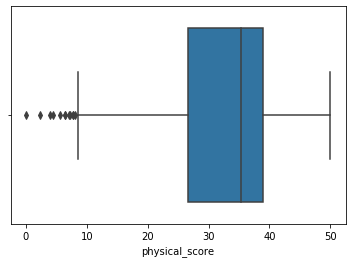

In [47]:
sns.boxplot(df.physical_score)
plt.show()

In [48]:
Q3 = df["physical_score"].quantile(0.75)
Q1 = df["physical_score"].quantile(0.25)
print("Q3:",Q3)
print("Q1:",Q1)
IQR = Q3-Q1
print("IQR:",IQR)

Q3: 38.90000000000001
Q1: 26.700000000000006
IQR: 12.200000000000006


In [17]:
lower_limit = Q1-(IQR*1.5)
print("lower_limit:",lower_limit)
upper_limit = Q3+(IQR*0.5)
print("upper_limit:",upper_limit)

lower_limit: 8.399999999999995
upper_limit: 45.000000000000014


In [49]:
df_trim = df[(df["physical_score"]>lower_limit) & (df["physical_score"] < upper_limit)]

In [51]:
df_trim

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4993,62.0,33.0,1
4994,41.0,39.9,1
4996,57.0,33.9,1
4997,49.0,34.5,1


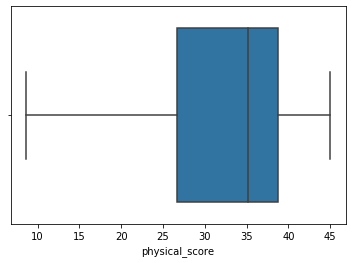

In [54]:
sns.boxplot(df_trim.physical_score)
plt.show()

In [55]:
X = df.drop("test_result",axis=1)
y = df["test_result"]

In [57]:
X

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [58]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [60]:
X_train.shape,X_test.shape

((3500, 2), (1500, 2))

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X_train = sc.fit_transform(X_train)
Scaled_X_test  =sc.fit_transform(X_test)

In [62]:
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression()
model.fit(Scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
model.coef_

array([[-0.91653034,  3.4506941 ]])

In [64]:
y_pred = model.predict(Scaled_X_test)

In [65]:
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy Score: 0.918
Confusion Matrix:
 [[518  79]
 [ 44 859]]


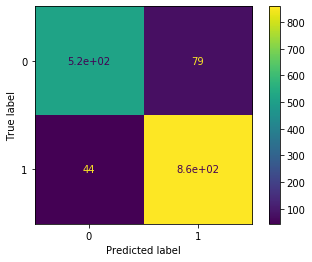

In [67]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(model,Scaled_X_test,y_test))
plt.show()

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       597
           1       0.92      0.95      0.93       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.92      0.92      0.92      1500



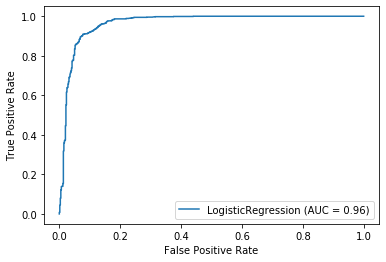

In [32]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,Scaled_X_test,y_test)
plt.show()